## Data Augmentation Demo

In this notebook, we will play around with Data Augmentation. Through an example, we will observe how to:

- Load an image and its corresponding bounding box details from a CSV file.
- Visualize the image and its bounding box.
- Perform a horizontal flip as a form of data augmentation.
- Re-visualize the augmented image with the updated bounding box.


As we said data augmentation is a strategy that enables us to increase the diversity of data available for training models, without actually collecting new data. It encompasses techniques such as flipping, rotation, zooming, cropping, and many others, which alter the training samples, thereby contributing to the model's robustness and ability to generalize well to unseen data. In our case, we will be performing horizontal flipping to our images.

Let's see how is going to be done:

In [1]:
# Necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [2]:
# Loading the image dataframe from a CSV file.
image_df = pd.read_csv("data/processed_csv/test.csv")

In [3]:
# Picking a random image
image = image_df.sample()
image

,header_cols,label_width,className,XMin,YMin,XMax,YMax,ImagePath
173,2,5,0.0,0.650625,0.051789,0.72125,0.217514,airplanes/images/test/006918fd9644b03d.jpg


1024 680


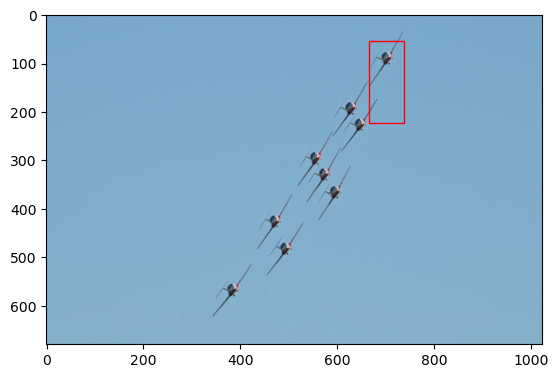

In [4]:
# Opening the original image and visualizing it along with its bounding box.
im = Image.open(f"{image.ImagePath.values[0]}")

fig, ax = plt.subplots()

ax.imshow(im)

im_width, im_height = im.size
print(im_width, im_height)

xmin = image.XMin.values[0] * im_width
xmax = image.XMax.values[0] * im_width
ymin = image.YMin.values[0] * im_width
ymax = image.YMax.values[0] * im_width


width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin,ymin), width, height, linewidth=1, edgecolor="r", facecolor='none')
ax.add_patch(rect)
plt.show()

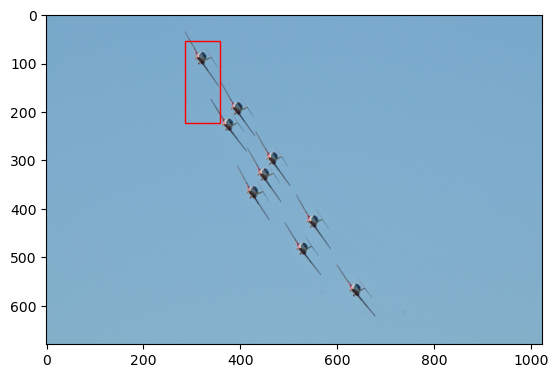

In [5]:
# Performing a horizontal flip on the image and visualizing the image with updated bounding box coordinates.
im = Image.open(f"{image.ImagePath.values[0]}")
im = im.transpose(Image.Transpose.FLIP_LEFT_RIGHT)

fig, ax = plt.subplots()

ax.imshow(im)

im_width, im_height = im.size


xmin = image.XMin.values[0] * im_width
xmax = image.XMax.values[0] * im_width
ymin = image.YMin.values[0] * im_width
ymax = image.YMax.values[0] * im_width

xmin = (im_width/2) - (xmin - (im_width/2))
xmax = (im_width/2) - (xmax - (im_width/2))


width = xmax - xmin
height = ymax - ymin

rect = patches.Rectangle((xmin,ymin), width, height, linewidth=1, edgecolor="r", facecolor='none')
ax.add_patch(rect)
plt.show()

In essence, this notebook serves as a quick guide to showcase how we can augment our dataset by performing a horizontal flip on images.